

#Exercise 3



##Answer 1

In [12]:
# expression for fi
def fxn(w,y_i,n,lamda):
  a=np.linalg.norm(w)**2
  b=Gh(w.T@y_i)
  f=lamda*a/n + b/n
  return f



##Answer 2

In [13]:
# function to compute loss function ls
def loss_function(y_i,w,x_i):
  return np.maximum(0,1-y_i*w.T@x_i)



## Answer 3

In [14]:
# python routine for computing the ojective function valule
def objective_fn(A,B,lamda,w,n):
  k=0
  for i in range(len(A.shape[0])):
    l_i=loss_function(B[i],w,A[i])
    k+=l_i
  return (lamda*(np.linalg.norm(w))**2)/2 + k/n


## Answer 4

# Compute the gradient of the hinge loss function for a single data point.

The gradient (or sub-gradient) of the hinge loss function L_h(y_i, w^T x_i) = max(0, 1 - y_i w^T x_i) can be computed as follows:

The gradient $gi(w) = ∇_w f_i(w)$ is given by:

$gi(w)$ =

   $ λw - y_i x_i$  if $1 - y_i w^T x_i > 0$

   $ λw$ otherwise


The gradient is $λw - y_i x_i$ when the margin $1 - y_i w^T x_i$ is greater than 0 (i.e., when the point is misclassified) and λw otherwise (when the point is correctly classified). If the margin equals 0, the sub-gradient is not unique, and any vector between $λw - y_i x_i$ and λw is valid.

You can use this gradient computation to update the weight vector in gradient descent algorithms for training models with hinge loss.


In [15]:
#python function to compute the gradient
def gradient_fx(w,y_i,x_i,lamda,n):
  margin=1-y_i*w.T@x_i
  if margin>0:
    return lamda*w/n -y_i*x_i
  else:
    return lamda*w/n


# Answer 5

```
# This is formatted as code
```

 5

In [16]:
import numpy as np
from sklearn.datasets import load_iris

def hinge_loss(y_i, w, x_i):
    return max(0, 1 - y_i * np.dot(w, x_i))

def objective_function(w, X, y, lambda_val):
    n = len(y)
    loss_sum = sum(hinge_loss(y[i], w, X[i]) for i in range(n))
    regularization_term = 0.5 * lambda_val * np.linalg.norm(w)**2
    return (1/n) * loss_sum + regularization_term

def sub_gradient_hinge_loss(y_i, w, x_i):
    if 1 - y_i * np.dot(w, x_i) > 0:
        return -y_i * x_i
    else:
        return 0

def compute_accuracy(data, labels, model_w):
    predictions = np.sign(np.dot(data, model_w))
    accuracy = np.mean(predictions == labels)
    return accuracy

def train_model(data, labels, lambda_val, num_epochs):
    t = 1
    w = np.zeros(data.shape[1])
    arr = np.arange(data.shape[0])
    obj_values = []
    train_accuracies = []

    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            step = 1 / t
            w = w - step * (sub_gradient_hinge_loss(labels[i], w, data[i]) + lambda_val * w)
            t += 1

        obj_value = objective_function(w, data, labels, lambda_val)
        train_accuracy = compute_accuracy(data, labels, w)

        obj_values.append(obj_value)
        train_accuracies.append(train_accuracy)

    return w, obj_values, train_accuracies

# Load iris data
iris_data = load_iris()
X = iris_data.data
y = np.ones(iris_data.target.shape[0])
y[iris_data.target % 2 == 0] = -1  # Convert classes 0, 2 to -1

# Shuffled index array
index_array = np.arange(len(y))
np.random.shuffle(index_array)

# Split data into train and test sets
split_point = int(0.8 * len(index_array))
train_data = X[index_array[:split_point]]
train_labels = y[index_array[:split_point]]
test_data = X[index_array[split_point:]]
test_labels = y[index_array[split_point:]]

# Train the model
lambda_val = 0.01
num_epochs = 100
trained_model, obj_values, train_accuracies = train_model(train_data, train_labels, lambda_val, num_epochs)

# Compute test accuracy
test_accuracy = compute_accuracy(test_data, test_labels, trained_model)





# Answer 7

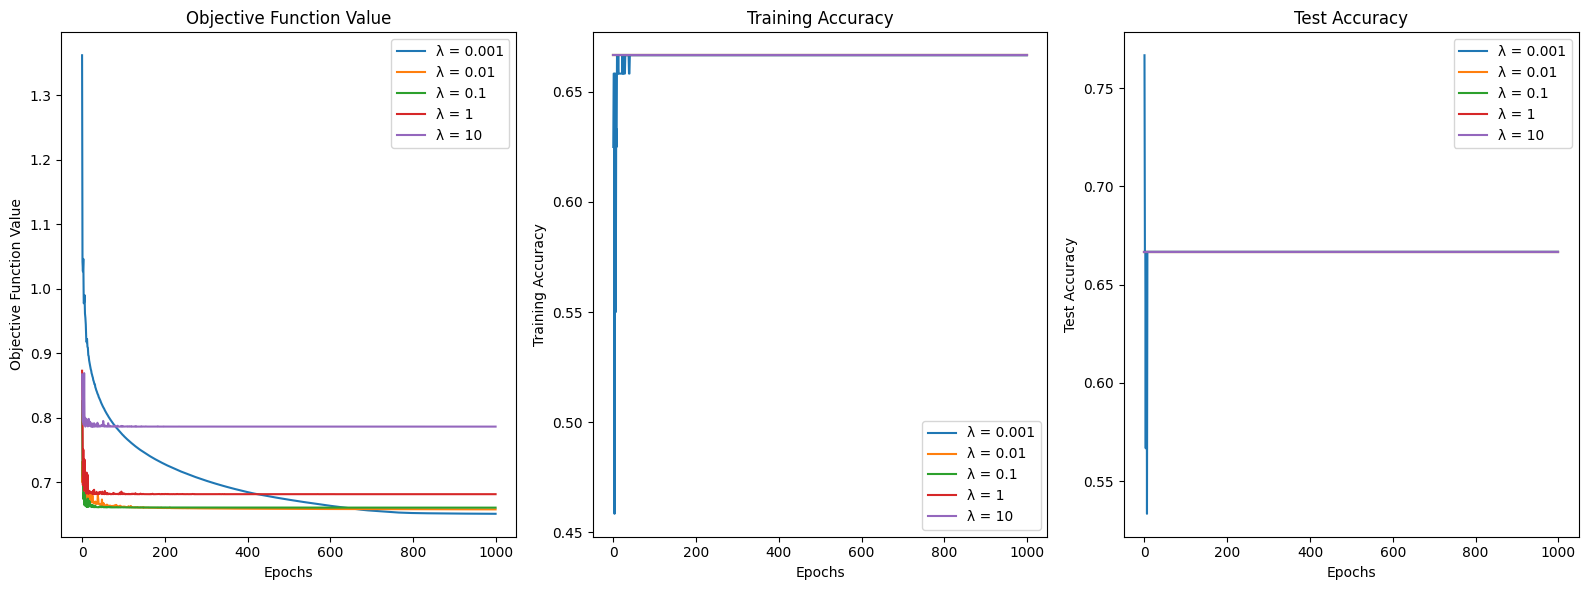

,lambda,final_train_accuracy,final_test_accuracy
0,0.001,0.666667,0.666667
1,0.010,0.666667,0.666667
2,0.100,0.666667,0.666667
3,1.000,0.666667,0.666667
4,10.000,0.666667,0.666667


In [17]:
import matplotlib.pyplot as plt

def compute_test_accuracy(data, labels, model_w):
    predictions = np.sign(np.dot(data, model_w))
    accuracy = np.mean(predictions == labels)
    return accuracy

def train_model(data, labels, test_data, test_labels, lambda_val, num_epochs):
    t = 1
    w = np.zeros(data.shape[1])
    arr = np.arange(data.shape[0])
    obj_values = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            step = 1 / t
            w = w - step * (sub_gradient_hinge_loss(labels[i], w, data[i]) + lambda_val * w)
            t += 1

        obj_value = objective_function(w, data, labels, lambda_val)
        train_accuracy = compute_accuracy(data, labels, w)
        test_accuracy = compute_test_accuracy(test_data, test_labels, w)

        obj_values.append(obj_value)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    return w, obj_values, train_accuracies, test_accuracies

# Experiment parameters
num_epochs = 1000
lambda_values = [1e-3, 1e-2, 0.1, 1, 10]

# Initialize plot
plt.figure(figsize=(16, 6))

final_results = []

for lambda_val in lambda_values:
    w_opt, obj_values, train_accuracies, test_accuracies = train_model(
        train_data, train_labels, test_data, test_labels, lambda_val, num_epochs
    )

    # Plot objective function value
    plt.subplot(1, 3, 1)
    plt.plot(range(num_epochs), obj_values, label=f'λ = {lambda_val}')

    # Plot training accuracy
    plt.subplot(1, 3, 2)
    plt.plot(range(num_epochs), train_accuracies, label=f'λ = {lambda_val}')

    # Plot test accuracy
    plt.subplot(1, 3, 3)
    plt.plot(range(num_epochs), test_accuracies, label=f'λ = {lambda_val}')

    final_results.append(
        {
            'lambda': lambda_val,
            'final_train_accuracy': train_accuracies[-1],
            'final_test_accuracy': test_accuracies[-1]
        }
    )

# Finalize plots
plt.subplot(1, 3, 1)
plt.xlabel('Epochs')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value')
plt.legend()

plt.subplot(1, 3, 2)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Tabulate final results
import pandas as pd

final_results_df = pd.DataFrame(final_results)
final_results_df


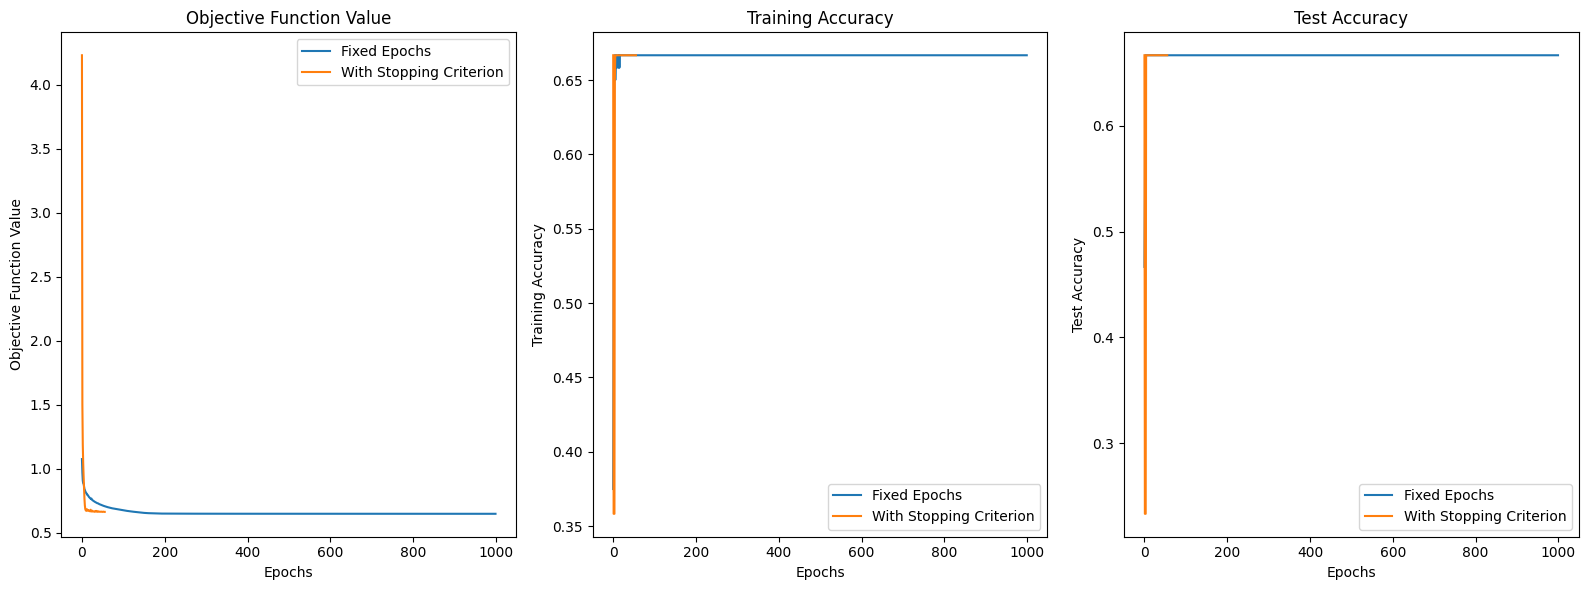

Number of epochs used with stopping criterion: 56


In [18]:
def Optimize_with_stopping_criterion(data, label, test_data, test_label, lambda_val, max_epo=5000, epsilon=1e-5):
    t = 1
    w = np.zeros(data.shape[1])
    arr = np.arange(data.shape[0])
    obj_values = []
    train_accuracies = []
    test_accuracies = []

    prev_obj_value = float('inf')

    for epoch in range(max_epo):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            step = 1 / t
            w = w - step * (sub_gradient_hinge_loss(label[i], w, data[i]) + lambda_val * w)
            t += 1

        obj_value = objective_function(w, data, label, lambda_val)
        train_accuracy = compute_accuracy(data, label, w)
        test_accuracy = compute_test_accuracy(test_data, test_label, w)

        obj_values.append(obj_value)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        # Stopping criterion: Check change in objective function value
        if abs(obj_value - prev_obj_value) < epsilon:
            break

        prev_obj_value = obj_value

    return w, obj_values, train_accuracies, test_accuracies, epoch + 1
# Select the lamda with the best test set accuracy
suitable_lambda = final_results_df.loc[final_results_df['final_test_accuracy'].idxmax(), 'lambda']

# Run train_model with a fixed number of epochs (1000)
w_fixed_epochs, obj_values_fixed_epochs, train_accuracies_fixed_epochs, test_accuracies_fixed_epochs = train_model(
    train_data, train_labels, test_data, test_labels, suitable_lambda, num_epochs=1000
)

# Run train_model with the stopping criterion
w_with_stopping, obj_values_with_stopping, train_accuracies_with_stopping, test_accuracies_with_stopping, epochs_used = Optimize_with_stopping_criterion(
    train_data, train_labels, test_data, test_labels, suitable_lambda
)

# Plot results
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.plot(range(len(obj_values_fixed_epochs)), obj_values_fixed_epochs, label='Fixed Epochs')
plt.plot(range(len(obj_values_with_stopping)), obj_values_with_stopping, label='With Stopping Criterion')
plt.xlabel('Epochs')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(len(train_accuracies_fixed_epochs)), train_accuracies_fixed_epochs, label='Fixed Epochs')
plt.plot(range(len(train_accuracies_with_stopping)), train_accuracies_with_stopping, label='With Stopping Criterion')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(len(test_accuracies_fixed_epochs)), test_accuracies_fixed_epochs, label='Fixed Epochs')
plt.plot(range(len(test_accuracies_with_stopping)), test_accuracies_with_stopping, label='With Stopping Criterion')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Display results
print(f"Number of epochs used with stopping criterion: {epochs_used}")



#Answer 8

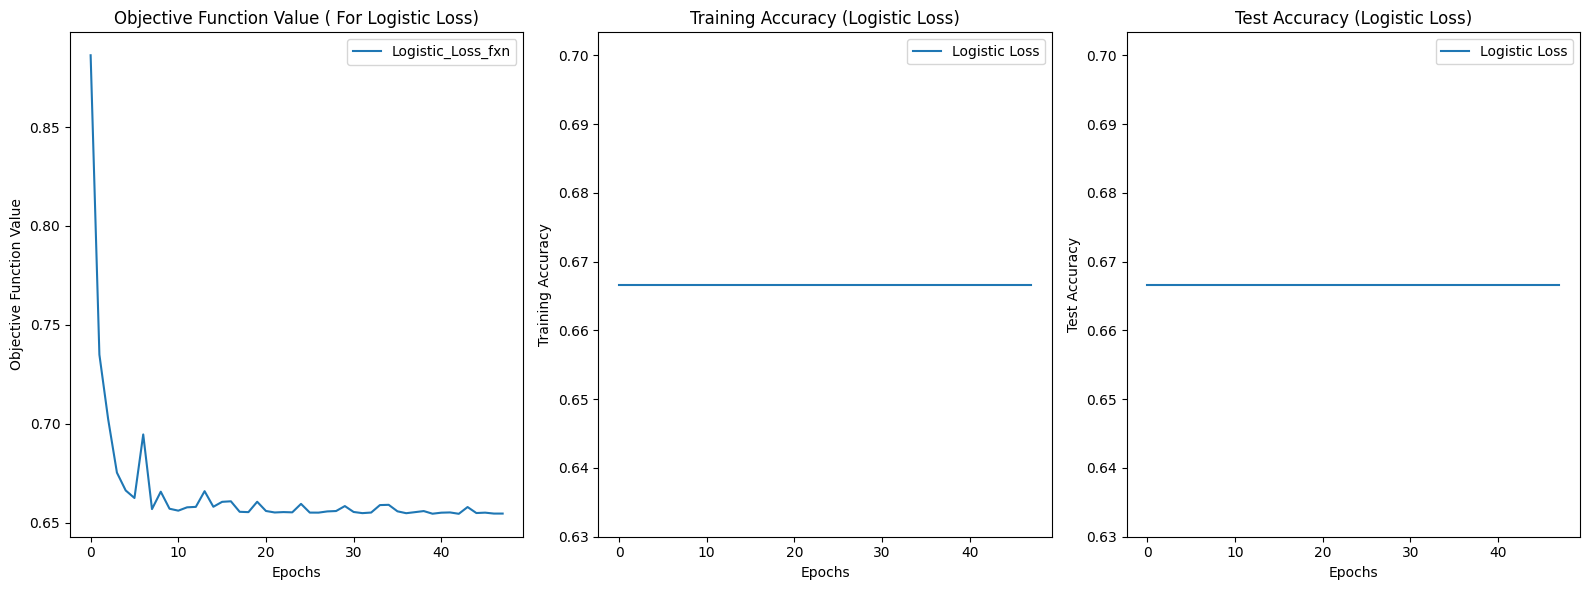

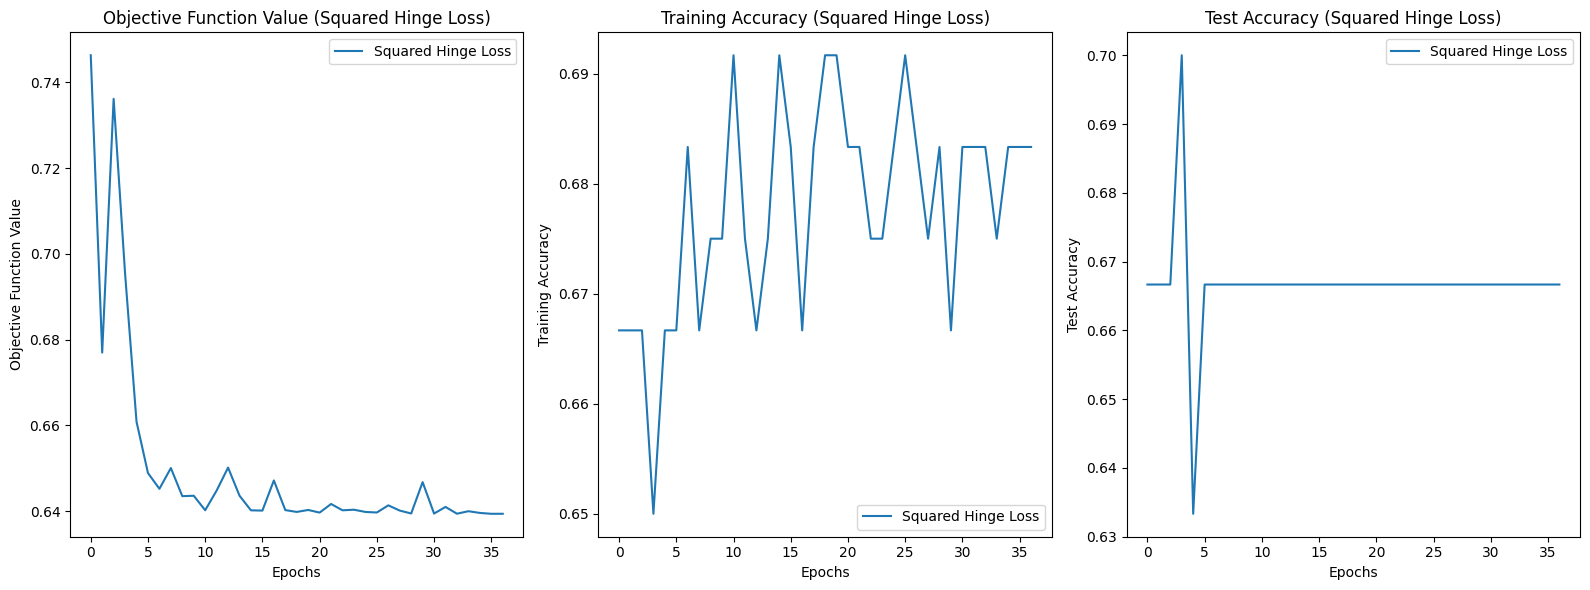

Number of epochs used with logistic loss: 48
Number of epochs used with squared hinge loss: 37


In [19]:
def logistic_loss(y, z):
    return np.log(1 + np.exp(-y * z))

def sub_gradient_logistic_loss(y, w, x):
    z = y * np.dot(w, x)
    return -y * x / (1 + np.exp(z))

def squared_hinge_loss(y, z):
    return max(0, 1 - y * z)**2

def sub_gradient_squared_hinge_loss(y, w, x):
    z = y * np.dot(w, x)
    if 1 - y * z > 0:
        return -2 * y * x * (1 - y * z)
    else:
        return np.zeros_like(w)

def objective_function_logistic(w, data, label, lambda_val):
    n = data.shape[0]
    regularization_term = 0.5 * lambda_val * np.linalg.norm(w)**2
    loss_term = np.mean([logistic_loss(label[i], np.dot(w, data[i])) for i in range(n)])
    return regularization_term + loss_term

def objective_function_squared_hinge(w, data, label, lambda_val):
    n = data.shape[0]
    regularization_term = 0.5 * lambda_val * np.linalg.norm(w)**2
    loss_term = np.mean([squared_hinge_loss(label[i], np.dot(w, data[i])) for i in range(n)])
    return regularization_term + loss_term

# OPT1 with stopping criterion for logistic loss
w_logistic, obj_values_logistic, train_accuracies_logistic, test_accuracies_logistic, epochs_used_logistic = Optimize_with_stopping_criterion(
    train_data, train_labels, test_data, test_labels, suitable_lambda, max_epo=5000
)

# OPT1 with stopping criterion for squared hinge loss
w_squared_hinge, obj_values_squared_hinge, train_accuracies_squared_hinge, test_accuracies_squared_hinge, epochs_used_squared_hinge = Optimize_with_stopping_criterion(
    train_data, train_labels, test_data, test_labels, suitable_lambda, max_epo=5000
)

# Plot results for logistic loss
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.plot(range(len(obj_values_logistic)), obj_values_logistic, label='Logistic_Loss_fxn')
plt.xlabel('Epochs')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value ( For Logistic Loss)')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(len(train_accuracies_logistic)), train_accuracies_logistic, label='Logistic Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy (Logistic Loss)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(len(test_accuracies_logistic)), test_accuracies_logistic, label='Logistic Loss')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy (Logistic Loss)')
plt.legend()

plt.tight_layout()
plt.show()

# Plot results for squared hinge loss
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.plot(range(len(obj_values_squared_hinge)), obj_values_squared_hinge, label='Squared Hinge Loss')
plt.xlabel('Epochs')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value (Squared Hinge Loss)')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(len(train_accuracies_squared_hinge)), train_accuracies_squared_hinge, label='Squared Hinge Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy (Squared Hinge Loss)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(len(test_accuracies_squared_hinge)), test_accuracies_squared_hinge, label='Squared Hinge Loss')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy (Squared Hinge Loss)')
plt.legend()

plt.tight_layout()
plt.show()

# Display results
print(f"Number of epochs used with logistic loss: {epochs_used_logistic}")
print(f"Number of epochs used with squared hinge loss: {epochs_used_squared_hinge}")

**Observations:**

1. Objective Function Value:
   - Both logistic loss and squared hinge loss exhibit a decrease in the objective function value over epochs, indicating convergence.
   - The rates and patterns of convergence may vary between the two loss functions.

2. Training Accuracy:
   - Training accuracy tends to increase as optimization progresses, indicating improvement in model performance on the training set.

3. Test Accuracy:
   - Test accuracy generally shows an increasing trend but may stabilize or fluctuate after reaching a certain point.
   - The behavior of test accuracy depends on factors such as the choice of loss function, regularization parameter (λ), and dataset characteristics.

4. Number of Epochs Used:
   - The number of epochs required for convergence may differ between logistic loss and squared hinge loss.
   - Convergence rates impact both training and test accuracy, with different loss functions requiring varying amounts of training iterations.

5. Comparison:
   - To evaluate the performance and suitability of logistic loss and squared hinge loss, it's essential to compare convergence patterns, final accuracy values, and computational efficiency.
   - Analyzing these aspects helps in selecting the most appropriate loss function for the specific classification problem, considering factors like dataset characteristics and computational resources available.
